# Exam 2 (100 pts total)

files needed = ('covid.csv', 'wdi_e2.csv', 'clubs.csv', 'roster.csv', 'q2a.csv') You can find them in 'exam2_data_prac.zip' on the course webpage.

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet, but you cannot work with others.  
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

Remember, jupyter notebooks and python have lots of built in help facilities.

## Question 0 (5 pts): Hong,Ruijing
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (5 points): Saving figures 

1. If you are saving a file to use on a website or to embed in a MS Word document which format should you use? Why?

Insert a cell below and type your answer there. 

In [ ]:
#SVG, not blurry when zoom in

## Question 2A (10 pts): Apply-split-combine

The file 'covid.csv' contains data on covid tests in Wisconsin by county. Each observation in the data is a county-day. The data cover March 15, 2020 to November 16, 2020.

1. The `POS_NEW` variable contains the day's new cases. Use this variable to compute the **cumulative** number of cases in each county. 
2. Sort your results by county name (a to z) and print out the first three counties.

In [35]:
import pandas as pd               
import matplotlib.pyplot as plt  
import seaborn as sns
import datetime as dt        

In [49]:
covid = pd.read_csv('covid.csv')
cases = covid.groupby('NAME')['POS_NEW'].sum()
cases.sort_index(inplace = True)
cases.head(3)

NAME
Adams       852.0
Ashland     514.0
Barron     2721.0
Name: POS_NEW, dtype: float64

In [47]:
cases

NAME
Adams          852.0
Ashland        514.0
Barron        2721.0
Bayfield       543.0
Brown        19865.0
              ...   
Waukesha     19071.0
Waupaca       3347.0
Waushara      1601.0
Winnebago    11879.0
Wood          3142.0
Name: POS_NEW, Length: 72, dtype: float64

In [141]:
atol = cases[ :35]
atol
mtoz = cases [36: ] 

## Question 2B (15 pts): Bar graphs and label formatting 

If you completed question 2A, you may use your results in this question. If not, use the file 'q2a.csv' to complete this question.

1. Create two subplots arranged as one column and two rows. Make the figure size 15 inches by 15 inches. 
3. In the top subplot, create a bar plot of the cumulative cases for the counties whose names start with A-L. The x axis should be the names of the counties.
4. In the bottom subplot, create a bar plot of the cumulative cases for the counties whose names start with M-Z. The x axis should be the names of the counties.
5. Rotate the county names on the x axis 90 degrees so that they are vertical.
6. Label the y axes 'cumulative number of cases.'
7. The bars should be silver and the major y-axis grid lines should be white.
8. Give your graph a title.
9. Remove the top and right spines from each subplot. 

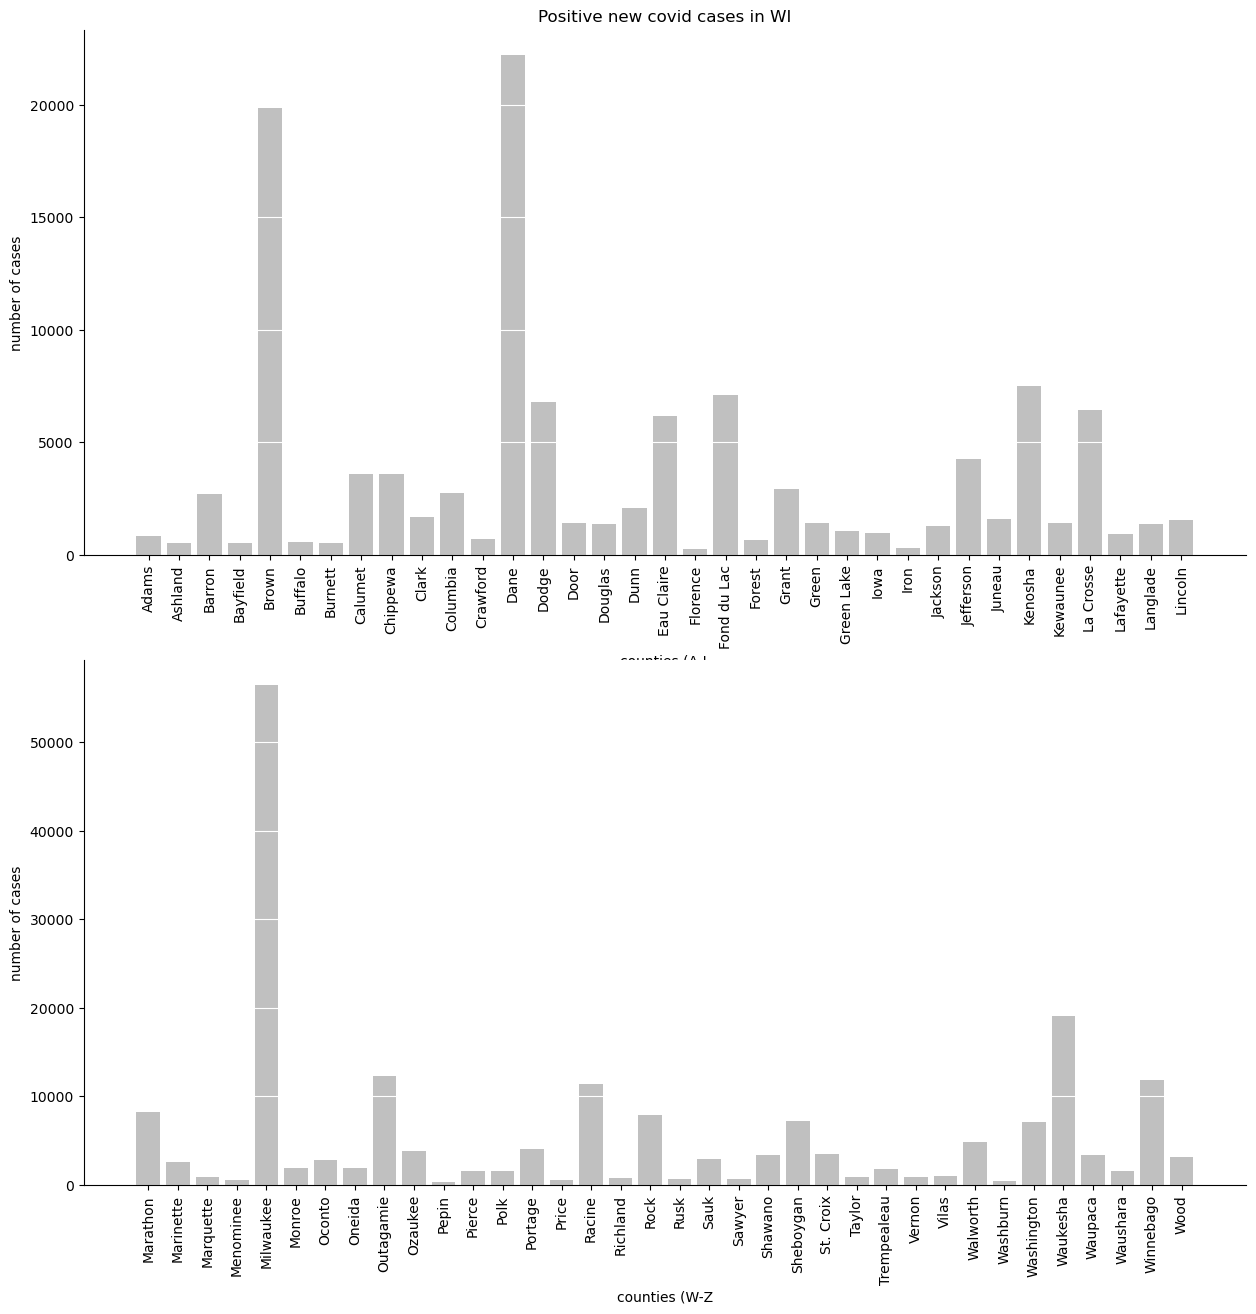

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
  
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].bar(atol.index,atol,color = 'silver', alpha = 1)
axes[1].bar(mtoz.index,mtoz,color = 'silver', alpha = 1)     

axes[0].tick_params(axis = 'x',labelrotation=90)
axes[1].tick_params(axis = 'x',labelrotation=90)

#set labels
axes[0].set_title('Positive new covid cases in WI')
axes[0].set_ylabel('number of cases')
axes[1].set_xlabel('counties (W-Z')
axes[0].set_xlabel('counties (A-L')
axes[1].set_ylabel('number of cases')

#grid
axes[0].grid(axis='y', color='white')
axes[1].grid(axis='y', color='white')

#despine
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
plt.show()



## Question 3 (15 pts): Long and wide data

The file 'wdi_e2.csv' contains data on real GDP and the working age population (15-64 years) for China and Japan from 1970 to 2019. 

1. Compute the ratio of GDP to the working age population for both countries for all years. Name the variable 'gdpc'.
2. Make sure that your DataFrame is organized so that the unit of observation (country-date) are rows and the variables are columns. 
3. Sorth the index of your DataFrame.
4. Print out the first two rows of your DataFrame.

In [94]:
df3 = pd.read_csv( 'wdi_e2.csv',parse_dates=['DATE'], index_col = ['DATE','var','cty'])
df3_1 = df3.unstack('var')
df3_1.columns = df3_1.columns.droplevel(level = 0)	
df3_1['gdpc'] = df3_1['gdp'] /  df3_1['pop']
df3_1.sort_index(inplace =True)

df3_1.head(2)

var                      gdp        pop        gdpc
DATE       cty                                     
1970-01-01 chn    228.510558  55.844752    4.091890
           jpn  18699.742958  69.010653  270.968933

## Question 4 (10 pts): FRED and working with dates

1. Download the weekly initial (unemployment) claims data for Wisconsin from FRED. Get the data from the beginning of 2019 to the most recent. \[Use the FRED website to find the variable code for 'Initial Claims in Wisconsin'.\]
2. Compute the average weekly claims for 2019 and the average weekly claims for 2020. Print them out as below, replacing the xs with the appropriate numbers.

   'The 2019 average weekly claims are xxxx. The 2020 average weekly claims are xxxxx.'
  
Note that the numbers are printed out as integers. 

In [99]:
import pandas_datareader.data as web   

code = ['WIICLAIMS']
fred = web.DataReader(code, 'fred', start= '2019-01-01', end = '2024-03-30' )
fred.head()

,WIICLAIMS
DATE,
2019-01-05,11915.0
2019-01-12,7989.0
2019-01-19,6332.0
2019-01-26,6902.0
2019-02-02,11372.0


In [107]:
df_y = fred.resample('y').mean()
df_y
round(5520.057692,2)
print('The 2019 average weekly claims are 5520.06. The 2020 average weekly claims are 7989.0.')

The 2019 average weekly claims are 5520.06. The 2020 average weekly claims are 7989.0.


## Done!
This was originally an exam given in the past. I think it was a little too long. Let's call Q1-Q4 the about the right length for the exam. I am leaving Q5 below, though, so you can use it to practice.  

## Question 5 (20 pts): Merging and cleaning

1. Load 'clubs.csv' into a DataFrame named `clubs`. The file contains data about four BIG10 schools. 
2. Load 'roster.csv' into a DataFrame named `roster`. The file contains data about football players at four BIG10 schools.
3. Merge the two DataFrames. The new DataFrame should contain all the players that are in the players dataset, matched to their team information.  Name the new DataFrame `data`. 
4. How many matches do you have? Print out the number as "There are xx matches in data."
5. There *should* be 50 matches but you probably found fewer. Let's fix this. Clean up the `clubs` and `roster` DataFrames using pandas commands (do not modify the data files) and perform another merge. Name this new matched DataFrame `data_clean`.
6. Print out the number as "There are xx matches in data_clean." (The xx should be equal to 50 at this point!)

In [109]:
clubs = pd.read_csv('clubs.csv')
roster= pd.read_csv('roster.csv' )

In [110]:
clubs

,team,mascot,city,state
0,wis,badger,Madison,WI
1,nwn,wildcat,Evanston,IL
2,umi,wolverine,Ann Arbor,MI
3,umn,gopher,Minneapolis,MN
4,msu,spartan,East Lansing,MI


In [111]:
roster.head()

,NUMBER,NAME,POSITION,WEIGHT,CLASS,TEAM
0,17,Jack Coan,QB,221,Jr,wis
1,5,Graham Mertz,QB,215,Fr,wis
2,15,Danny Vanden Boom,QB,207,Soph,wis
3,2,Chase Wolf,QB,196,Fr,wis
4,32,Julius Davis,RB,189,Fr,wis


In [179]:
df_outer = pd.merge(left=clubs, right=roster, left_on=['team'], right_on=['TEAM'], how='outer', indicator=True)
df_outer.value_counts('_merge')		
#df_outer.head()

_merge
right_only    26
both          25
left_only      2
Name: count, dtype: int64

In [117]:
clubs_cleaned = clubs['team'].str.strip()
roster_cleaned = roster['TEAM'].str.strip()

In [121]:
remerged = pd.merge(left=clubs_cleaned, right=roster_cleaned, left_on=['team'], right_on=['TEAM'], how='outer', indicator=True)
remerged['_merge'].value_counts()


_merge
both          50
left_only      1
right_only     1
Name: count, dtype: int64

In [164]:
data = pd.read_csv( 'q2a.csv', index_col = 'NAME')
data.head()

,POS_NEW
NAME,
Adams,852.0
Ashland,514.0
Barron,2721.0
Bayfield,543.0
Brown,19865.0


In [170]:
a_l = data[ :34]
a_l.head()

,POS_NEW
NAME,
Adams,852.0
Ashland,514.0
Barron,2721.0
Bayfield,543.0
Brown,19865.0


In [172]:
low = data[data.index.str.slice(0,1) <= 'L']
high = data[data.index.str.slice(0,1) > 'L']

<BarContainer object of 37 artists>

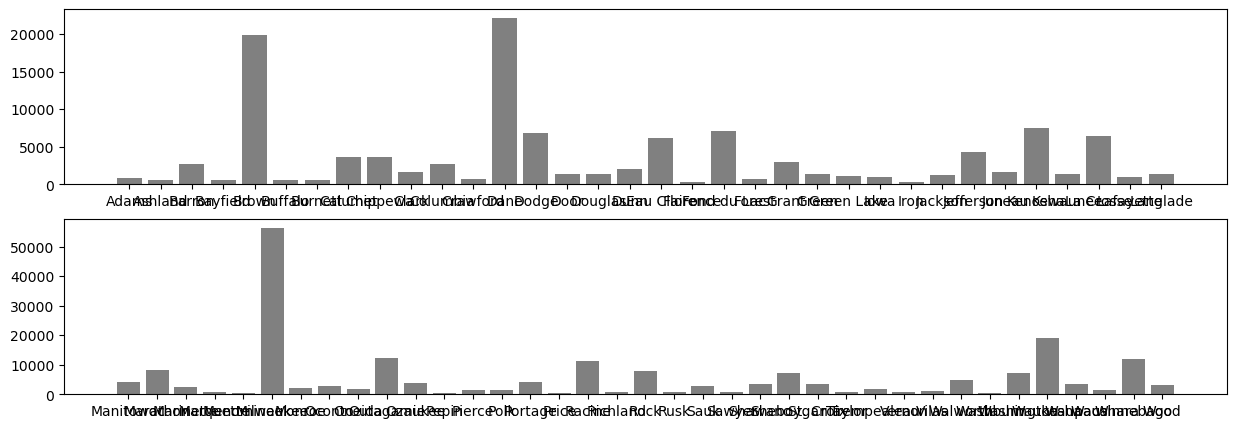

In [174]:
fig, axs = plt.subplots(2, 1, figsize=(15,5))
axs[0].bar(a_l.index, a_l['POS_NEW'], color='grey', alpha=1.0)     
axs[1].bar(high.index, high['POS_NEW'], color='grey', alpha=1.0)     


